<a href="https://colab.research.google.com/github/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/blob/main/7%20Feature%20Engineering%20%26%20Feature%20selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering & Feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install openpyxl -q
import openpyxl
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for grid
!pip install geopy -q
from geopy.distance import geodesic

# Set display options
%matplotlib inline
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 1000)

In [ ]:
# apartments = pd.read_excel('https://raw.githubusercontent.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/main/apartments_5.xlsx', engine='openpyxl')

In [13]:
# import pickle

!wget https://github.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/raw/main/apartments5.pkl -q

with open('apartments5.pkl', 'rb') as f:
    apartments = pickle.load(f)

!wget https://github.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/raw/main/lat_bin.pkl -q
!wget https://github.com/IlyaZutler/Project-3-Berlin-Airbnb-Ratings/raw/main/lon_bin.pkl -q

with open('lat_bin.pkl', 'rb') as f:
    lat_bin = pickle.load(f)

with open('lon_bin.pkl', 'rb') as f:
    lon_bin = pickle.load(f)


In [14]:
apartments.shape

(19664, 43)

In [15]:
apartments.head(5)

,Listing ID,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,Postal Code,Latitude,Longitude,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Polarity_min,Polarity_max,Polarity_median,Polarity_mean,Host Since Years,Last Review Years,First Review Years,Latitude_Bin,Longitude_Bin,Price Log,Reviews Log,Distance_from_center
0,10002699,2015-09-20,NaN,NaN,f,NeukÃ¶lln,NeukÃ¶lln,12047.0,52.49234,13.42994,t,Apartment,Entire home/apt,4,1,2,2,60,1,1,1,2016-01-03,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,0.737083,0.737083,0.737083,0.737083,8.914442,8.626968,8.626968,85,68,4.110874,0.693147,2.486293
1,10002922,2015-10-05,NaN,NaN,f,Prenzlauer Berg,Pankow,10405.0,52.53292,13.41502,f,Apartment,Entire home/apt,2,1,1,1,52,1,1,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,8.873374,NaN,NaN,109,65,3.970292,0.000000,2.629529
2,10006647,2015-08-07,within a few hours,1.0,f,Mitte,Mitte,10178.0,52.52134,13.41866,t,Apartment,Private room,2,1,1,1,35,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,-0.125000,0.741667,0.328125,0.311207,9.034908,7.515400,8.626968,102,66,3.583519,3.044522,1.506549
3,10006747,2015-12-15,NaN,NaN,f,Pankow,Pankow,13189.0,52.56552,13.41189,t,Apartment,Entire home/apt,3,1,1,2,30,1,4,2,2015-12-28,2016-01-06,90.0,10.0,9.0,9.0,8.0,9.0,9.0,f,0.255833,0.441667,0.348750,0.348750,8.678987,8.618754,8.643395,128,64,3.433987,1.098612,6.209915
4,10007526,2013-08-23,NaN,NaN,f,Potsdamer Platz,Friedrichshain-Kreuzberg,10963.0,52.50585,13.38580,t,Apartment,Private room,4,1,1,2,30,1,3,3,2016-01-01,2016-03-30,100.0,10.0,9.0,10.0,10.0,9.0,9.0,t,0.000000,0.375333,0.280903,0.218745,10.989733,8.388775,8.632444,93,59,3.433987,1.386294,1.509809


In [ ]:
apartments.drop(columns=['Host Since','First Review', 'Last Review','Reviews', 'Price Log', 'Latitude_Bin', 'Longitude_Bin' ], inplace=True)

In [19]:
apartments.columns

Index(['Listing ID', 'Host Response Time', 'Host Response Rate',
       'Is Superhost', 'neighbourhood', 'Neighborhood Group', 'Postal Code',
       'Latitude', 'Longitude', 'Is Exact Location', 'Property Type',
       'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Min Nights', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable', 'Polarity_min',
       'Polarity_max', 'Polarity_median', 'Polarity_mean', 'Host Since Years',
       'Last Review Years', 'First Review Years', 'Latitude_Bin',
       'Longitude_Bin', 'Reviews Log', 'Distance_from_center'],
      dtype='object')

# CatBoost feature importance

for CatBost no nessery

In [28]:
X = apartments.drop(['Listing ID', 'Price', 'Latitude_Bin', 'Longitude_Bin'], axis=1)
y = apartments['Price']



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
!pip install catboost -q
from catboost import CatBoostRegressor, Pool  # Now CatBoost is available

num_features = X.select_dtypes(include='number').columns
cat_features = X.select_dtypes(exclude='number').columns

for col in cat_features:
    if X[col].dtype != 'str':
        X[col] = X[col].astype(str)

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Convert cat_features to a list
cat_features = cat_features.tolist()  # This is the key change

# Создаем модели для обучающей и тестовой выборок с указанием категориальных признаков
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Инициализируем и обучаем модель
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(train_pool)

# Предсказания на тестовой выборке
y_pred = model.predict(test_pool)

# Вычисляем метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим метрики
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# # Выводим важность признаков
# feature_importances = model.get_feature_importance(train_pool)
# for feature_name, importance in zip(num_features + cat_features, feature_importances):
#     print(f'Feature: {feature_name}, Importance: {importance}')


# Выводим важность признаков
feature_importances = model.get_feature_importance(train_pool)
# Create a list of tuples (feature_name, importance)
feature_importance_tuples = []
for feature_index in range(len(feature_importances)):
    if feature_index < len(num_features):
        feature_name = num_features[feature_index]
    else:
        feature_name = cat_features[feature_index - len(num_features)]
    importance = feature_importances[feature_index]
    feature_importance_tuples.append((feature_name, importance))

# Sort the list of tuples by importance in descending order
feature_importance_tuples.sort(key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature_name, importance in feature_importance_tuples:
    print(f'Feature: {feature_name}, Importance: {importance}')


0:	learn: 36.9099196	total: 63.3ms	remaining: 1m 3s
100:	learn: 23.7602615	total: 4.85s	remaining: 43.2s
200:	learn: 22.3647429	total: 8.62s	remaining: 34.3s
300:	learn: 21.5041574	total: 11.9s	remaining: 27.7s
400:	learn: 20.7662248	total: 14.2s	remaining: 21.2s
500:	learn: 20.1225980	total: 16.1s	remaining: 16.1s
600:	learn: 19.5712921	total: 18.1s	remaining: 12s
700:	learn: 19.0456551	total: 20s	remaining: 8.53s
800:	learn: 18.5862528	total: 24.7s	remaining: 6.14s
900:	learn: 18.1061882	total: 30.3s	remaining: 3.33s
999:	learn: 17.7207356	total: 32.4s	remaining: 0us
Mean Squared Error: 599.6404476484398
Mean Absolute Error: 16.08437329137481
R^2 Score: 0.5955469074073529
Feature: Accuracy Rating, Importance: 14.306431974650101
Feature: Cleanliness Rating, Importance: 10.211872545062597
Feature: Communication Rating, Importance: 8.971942693402283
Feature: Instant Bookable, Importance: 5.309689086666982
Feature: Value Rating, Importance: 5.204189870606448
Feature: Guests Included, Imp

# Encoding

Converting categorical data to numerical

In [ ]:
categorical_cols = apartments.select_dtypes(exclude='number').columns
for col in categorical_cols:
  print(f"Value counts for column '{col}' :")
  print(apartments[col].value_counts())
  print(f"NaN values: {apartments[col].isnull().sum()} ")
  print()
  print()

In [ ]:
apartments['Is Superhost'] = apartments['Is Superhost'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Instant Bookable'] = apartments['Instant Bookable'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Is Exact Location'] = apartments['Is Exact Location'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Property Type'] = apartments['Property Type'].replace({'Apartment': 1, 'Condominium': 0}).fillna(0).astype(int)
apartments['Room Type'] = apartments['Room Type'].replace({'Private room': 1, 'Entire home/apt': 0}).fillna(0).astype(int)

apartments['Host Response Time'] = apartments['Host Response Time'].replace(
    {'within an hour':0, 'within a few hours': 1, 'within a day': 2, 'a few days or more': 3 }).fillna(0).astype(int)

In [ ]:
# Perform one-hot encoding and drop the first column
neighborhood_dummies = pd.get_dummies(apartments['Neighborhood Group'], prefix='Neighborhood', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
apartments = pd.concat([apartments, neighborhood_dummies], axis=1)

In [ ]:
numeric_columns = apartments.select_dtypes(include=['number']).columns

print(numeric_columns)

Index(['Host Response Time', 'Host Response Rate', 'Is Superhost', 'Latitude',
       'Longitude', 'Is Exact Location', 'Property Type', 'Room Type',
       'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Min Nights', 'Reviews', 'Overall Rating',
       'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating',
       'Communication Rating', 'Location Rating', 'Value Rating',
       'Instant Bookable', 'Polarity_min', 'Polarity_max', 'Polarity_median',
       'Polarity_mean', 'Host Since Years', 'Last Review Years',
       'First Review Years', 'Latitude_Bin', 'Longitude_Bin', 'Price Log',
       'Reviews Log', 'Distance_from_center'],
      dtype='object')


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

numeric_columns = numeric_columns.drop(['Price Log'])

df = apartments[numeric_columns].copy()

# Предположим, что df - ваш датафрейм
X = df.drop('Price', axis=1)
y = df['Price']

# Создаем модель Лассо
model = Lasso(alpha=0.1)  # Параметр alpha регулирует степень регуляризации
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)

print(f"\n Lasso")
print(f"R^2: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


# Важность признаков
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Feature importance using Lasso:")
print(feature_importance)

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Filling Missing Values


## Post Code

Find the nearest object with filled Post Code.

We use grid to do it quicklly

In [ ]:
def fill_missing_postal_codes(apartments):

    apartments_filled = apartments.copy()
    missing_indices = apartments_filled['Postal Code'].isnull()

    for i in apartments_filled[missing_indices].index:
        lat = apartments_filled.loc[i, 'Latitude']
        lon = apartments_filled.loc[i, 'Longitude']
        lat_bin = apartments_filled.loc[i, 'Latitude_Bin']
        lon_bin = apartments_filled.loc[i, 'Longitude_Bin']

        search_radius = 1  # begin +/-1 bin
        found = False
        while not found:
            nearby_apartments = apartments_filled[
                (apartments_filled['Latitude_Bin'].between(lat_bin - search_radius, lat_bin + search_radius)) &
                (apartments_filled['Longitude_Bin'].between(lon_bin - search_radius, lon_bin + search_radius)) &
                (~apartments_filled['Postal Code'].isnull())
            ]

            if not nearby_apartments.empty:
                distances = nearby_apartments.apply(
                    lambda row: geodesic((lat, lon), (row['Latitude'], row['Longitude'])).km,
                    axis=1
                )
                nearest_index = distances.idxmin()
                apartments_filled.loc[i, 'Postal Code'] = apartments_filled.loc[nearest_index, 'Postal Code']
                found = True
            else:
                search_radius += 1

    return apartments_filled


apartments['Postal Code'] = apartments['Postal Code'].replace('nan', np.nan)
apartments = fill_missing_postal_codes(apartments)
apartments['Postal Code'].isnull().sum()

0

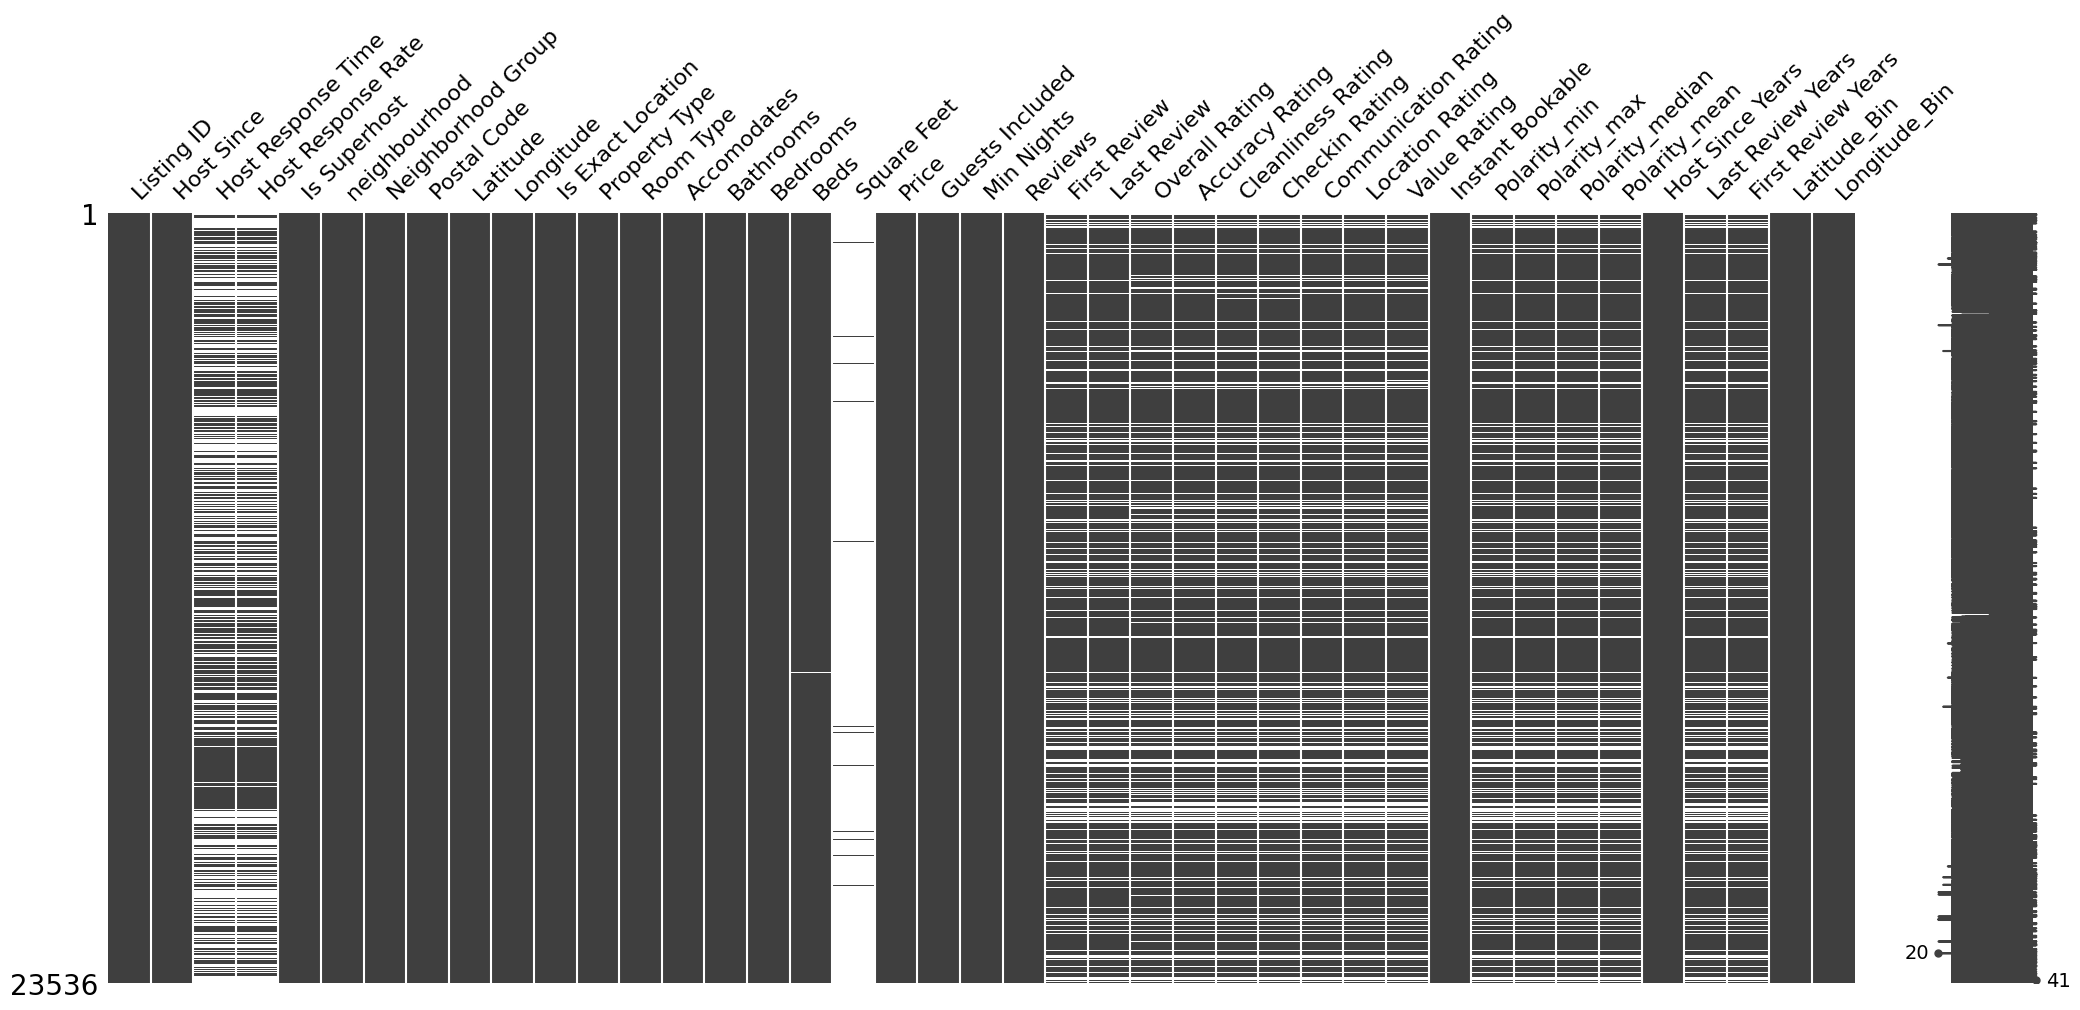

In [ ]:
msno.matrix(apartments)
plt.show()

<Axes: >

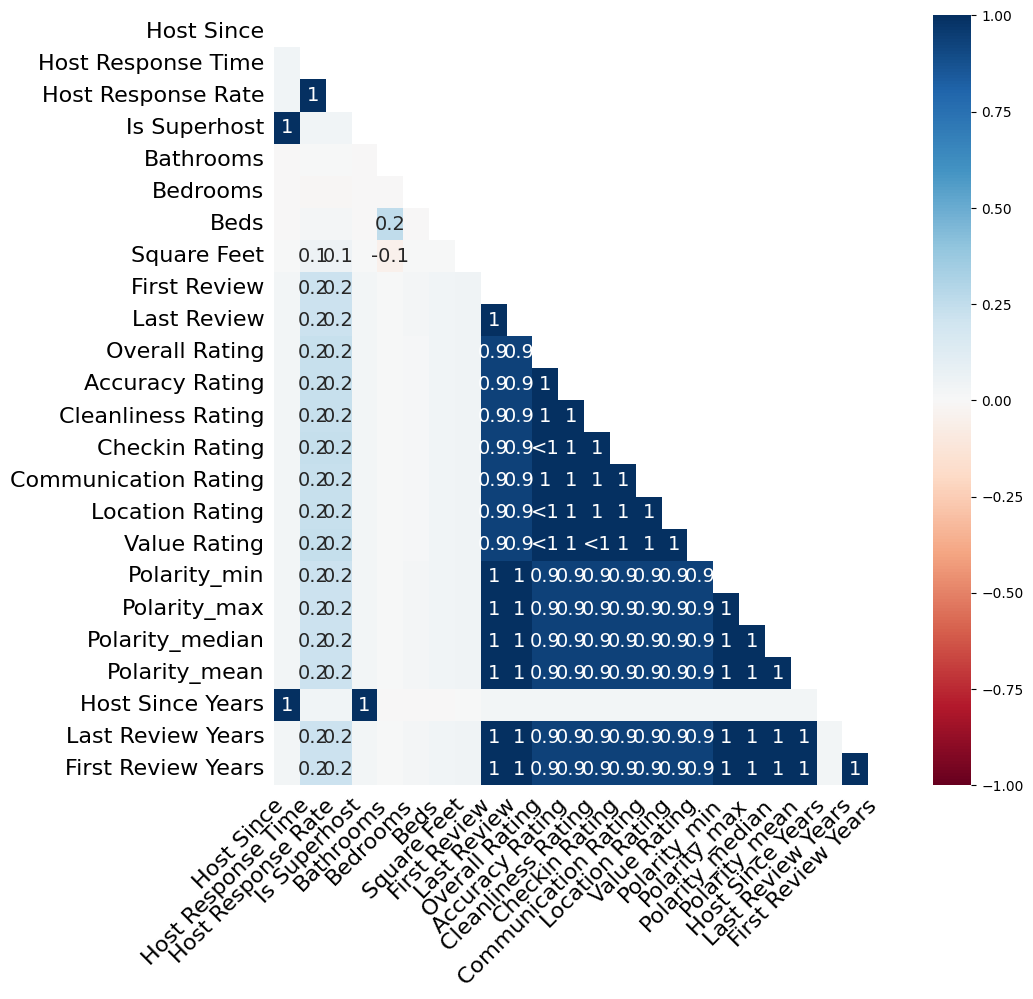

In [ ]:
msno.heatmap(apartments,figsize=(10,10))

In [ ]:
# Calculate the proportion of missing values for columns with missing data
missing_proportions = apartments.isnull().sum() / len(apartments)
print(missing_proportions[missing_proportions > 0])

Host Since              0.000892
Host Response Time      0.445700
Host Response Rate      0.445700
Is Superhost            0.000892
Bathrooms               0.001232
Bedrooms                0.000850
Beds                    0.001487
Square Feet             0.981943
First Review            0.176581
Last Review             0.176581
Overall Rating          0.196380
Accuracy Rating         0.197485
Cleanliness Rating      0.197315
Checkin Rating          0.198249
Communication Rating    0.197570
Location Rating         0.198207
Value Rating            0.198334
Polarity_min            0.176666
Polarity_max            0.176666
Polarity_median         0.176666
Polarity_mean           0.176666
Host Since Years        0.000892
Last Review Years       0.176581
First Review Years      0.176581
dtype: float64


## Filling using MICE

In [ ]:
# !pip install fancyimpute -q
# from fancyimpute import IterativeImputer

apartments = apartments.reset_index(drop=True)

# Select only numeric columns for imputation
numeric_columns = apartments.select_dtypes(include=np.number).columns
apartments_numeric = apartments[numeric_columns].copy()


# Perform MICE imputation
mice_imputer = IterativeImputer()
apartments_imputed = mice_imputer.fit_transform(apartments_numeric)

# Convert the imputed array back to a DataFrame
apartments_imputed = pd.DataFrame(apartments_imputed, columns=numeric_columns)

apartments[['Bathrooms', 'Bedrooms', 'Beds']] = apartments_imputed[['Bathrooms', 'Bedrooms', 'Beds']].round(0).astype(int)
apartments['Host Since Years'] = apartments_imputed['Host Since Years']

In [ ]:
# Calculate the proportion of missing values for columns with missing data
missing_proportions = apartments.isnull().sum() / len(apartments)
print(missing_proportions[missing_proportions > 0])

Host Since              0.000892
Host Response Time      0.445700
Host Response Rate      0.445700
Is Superhost            0.000892
Square Feet             0.981943
First Review            0.176581
Last Review             0.176581
Overall Rating          0.196380
Accuracy Rating         0.197485
Cleanliness Rating      0.197315
Checkin Rating          0.198249
Communication Rating    0.197570
Location Rating         0.198207
Value Rating            0.198334
Polarity_min            0.176666
Polarity_max            0.176666
Polarity_median         0.176666
Polarity_mean           0.176666
Last Review Years       0.176581
First Review Years      0.176581
dtype: float64


In [ ]:
#from datetime import datetime, timedelta

# Get today's date
today = datetime.now()

# Fill missing 'Host Since' values
for index, row in apartments.iterrows():
  if pd.isnull(row['Host Since']):
    years_as_host = row['Host Since Years']
    host_since_date = today - timedelta(days=years_as_host * 365.2425)  # Account for leap years
    apartments.loc[index, 'Host Since'] = host_since_date.strftime('%Y-%m-%d')

In [ ]:
# Calculate the mode of 'Is Superhost' column
mode = apartments['Is Superhost'].mode()[0]
# Fill missing values with the mode
apartments['Is Superhost'].fillna(mode, inplace=True)

In [ ]:
# Calculate the proportion of missing values for columns with missing data
missing_proportions = apartments.isnull().sum() / len(apartments)
print(missing_proportions[missing_proportions > 0])

Host Response Time      0.445700
Host Response Rate      0.445700
First Review            0.176581
Last Review             0.176581
Overall Rating          0.196380
Accuracy Rating         0.197485
Cleanliness Rating      0.197315
Checkin Rating          0.198249
Communication Rating    0.197570
Location Rating         0.198207
Value Rating            0.198334
Polarity_min            0.176666
Polarity_max            0.176666
Polarity_median         0.176666
Polarity_mean           0.176666
Last Review Years       0.176581
First Review Years      0.176581
dtype: float64


# Encoding

Converting categorical data to numerical


In [ ]:
categorical_cols = apartments.select_dtypes(exclude='number').columns
for col in categorical_cols:
  print(f"Value counts for column '{col}' :")
  print(apartments[col].value_counts())
  print(f"NaN values: {apartments[col].isnull().sum()} ")
  print()
  print()

Value counts for column 'Listing ID' :
Listing ID
10002699    1
30934593    1
30947505    1
30946969    1
30946705    1
           ..
20716366    1
20716294    1
20710491    1
20710283    1
9996186     1
Name: count, Length: 19664, dtype: int64
NaN values: 0 


Value counts for column 'Host Since' :
Host Since
2016-02-19    36
2016-08-02    33
2015-07-29    28
2015-02-18    27
2015-08-04    27
              ..
2011-12-29     1
2011-05-06     1
2019-01-25     1
2011-08-18     1
2009-08-25     1
Name: count, Length: 3028, dtype: int64
NaN values: 0 


Value counts for column 'Host Response Time' :
Host Response Time
within an hour        5389
within a few hours    2250
within a day          2208
a few days or more     466
Name: count, dtype: int64
NaN values: 9351 


Value counts for column 'Is Superhost' :
Is Superhost
f    16851
t     2813
Name: count, dtype: int64
NaN values: 0 


Value counts for column 'neighbourhood' :
neighbourhood
NeukÃ¶lln                3182
Prenzlauer Berg    

In [ ]:
apartments['Is Superhost'] = apartments['Is Superhost'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Instant Bookable'] = apartments['Instant Bookable'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Is Exact Location'] = apartments['Is Exact Location'].replace({'t': 1, 'f': 0}).fillna(0).astype(int)
apartments['Property Type'] = apartments['Property Type'].replace({'Apartment': 1, 'Condominium': 0}).fillna(0).astype(int)
apartments['Room Type'] = apartments['Room Type'].replace({'Private room': 1, 'Entire home/apt': 0}).fillna(0).astype(int)

apartments['Host Response Time'] = apartments['Host Response Time'].replace(
    {'within an hour':0, 'within a few hours': 1, 'within a day': 2, 'a few days or more': 3 }).fillna(0).astype(int)


In [ ]:
# Perform one-hot encoding and drop the first column
neighborhood_dummies = pd.get_dummies(apartments['Neighborhood Group'], prefix='Neighborhood', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
apartments = pd.concat([apartments, neighborhood_dummies], axis=1)


In [ ]:
apartments.columns

Index(['Listing ID', 'Host Since', 'Host Response Time', 'Host Response Rate',
       'Is Superhost', 'neighbourhood', 'Neighborhood Group', 'Postal Code',
       'Latitude', 'Longitude', 'Is Exact Location', 'Property Type',
       'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Guests Included', 'Min Nights', 'Reviews', 'First Review',
       'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable', 'Polarity_min',
       'Polarity_max', 'Polarity_median', 'Polarity_mean', 'Host Since Years',
       'Last Review Years', 'First Review Years', 'Latitude_Bin',
       'Longitude_Bin', 'Price Log', 'Neighborhood_Friedrichshain-Kreuzberg',
       'Neighborhood_Lichtenberg', 'Neighborhood_Marzahn - Hellersdorf',
       'Neighborhood_Mitte', 'Neighborhood_NeukÃ¶lln', 'Neighborhood_Pankow',
       'Neighborhood_Reinickendorf', 'Neighborho

In [ ]:
#apartments.to_excel('apartments_6.xlsx', index=False)

# import pickle
with open('apartments6.pkl', 'wb') as f:
    pickle.dump(apartments, f)


# Average of neighbors calculation

In [ ]:
def weighted_location_rating(lat, lon, lat_bin, lon_bin, df, target_col, weight_col, primary_threshold_m=250,
                             primary_bin_range = 1,  secondary_threshold_m=500, secondary_bin_range = 2):

    epsilon = 0.03  # Маленькое значение для предотвращения деления на ноль
    #  determine_bins(lat, lon, lat_bin, lon_bin)
    lat_bin = np.digitize(lat, lat_bin) - 1
    lon_bin = np.digitize(lon, lon_bin) - 1

    def calculate_weighted_average(threshold_km, bin_range):
        weighted_sum = 0
        total_weight = 0

        # objects from the nearest bins
        nearby_bins = df[(df['Latitude_Bin'] >= lat_bin - bin_range) & (df['Latitude_Bin'] <= lat_bin + bin_range) &
                         (df['Longitude_Bin'] >= lon_bin - bin_range) & (df['Longitude_Bin'] <= lon_bin + bin_range)]

        for i in range(len(nearby_bins)):
            lat_i, lon_i = nearby_bins.iloc[i]['Latitude'], nearby_bins.iloc[i]['Longitude']
            dist_km = great_circle((lat, lon), (lat_i, lon_i)).kilometers
            if dist_km <= threshold_km:
                weight = 1 / (dist_km + epsilon) * nearby_bins.iloc[i][weight_col]
                weighted_sum += nearby_bins.iloc[i][target_col] * weight
                total_weight += weight

        return weighted_sum, total_weight

    # Первоначальный расчет для соседних бинов (±1) и порога 500 метров
    threshold_km = primary_threshold_m / 1000
    weighted_sum, total_weight = calculate_weighted_average(threshold_km, bin_range = primary_bin_range)

    # Если нет точек в соседних бинах, увеличиваем диапазон до ±2 и порог до 1000 метров
    if total_weight == 0:
        threshold_km = secondary_threshold_m / 1000
        weighted_sum, total_weight = calculate_weighted_average(threshold_km, secondary_bin_range)  # для 500 бин 1

    if total_weight == 0:
        return np.nan # Если нет соседей, возвращаем 8 1/2, а не np.nan
    weighted_avg = weighted_sum / total_weight
    return weighted_avg

df = apartments[['Latitude', 'Longitude', 'Latitude_Bin', 'Longitude_Bin','Location Rating Roughly','Reviews Log']]
df.dropna(inplace=True)
print(df.shape)
df = df.reset_index(drop=True)


# Пример использования функции
lat = 52.489182
lon = 13.416555
weighted_rating = weighted_location_rating(lat, lon, lat_bin, lon_bin, df, weight_col = 'Reviews Log',
            target_col = 'Location Rating Roughly', primary_threshold_m=150, primary_bin_range = 1,
            secondary_threshold_m=500, secondary_bin_range = 2)
print(f"Weighted Location Rating: {weighted_rating}")

(16139, 6)
Weighted Location Rating: 9.620934607762823
